<a href="https://colab.research.google.com/github/ud204/Python-project/blob/main/Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load datasets
geometries = pd.read_csv('geometries.csv')
location_ratings = pd.read_csv('location_ratings.csv')
locations = pd.read_csv('locations.csv')
simulations = pd.read_csv('simulations.csv')

In [3]:
# Step 2: Merging Datasets
# Assuming 'apartment_id' and 'building_id' are common identifiers
merged_data = pd.merge(geometries, location_ratings, on='building_id', how='inner')
merged_data = pd.merge(merged_data, locations, on='building_id', how='inner')
merged_data = pd.merge(merged_data, simulations, on='apartment_id', how='inner')

In [4]:
# Step 3: Feature Engineering
# Add relevant features based on the hypothesis goal
# Example: Calculate a new feature 'total_area' combining layout_area and layout_net_area
merged_data['total_area'] = merged_data['layout_area'] + merged_data['layout_net_area']

In [5]:
# Step 4: Descriptive Analytics
# Basic statistics
descriptive_stats = merged_data.describe()

In [25]:
column_names = list(merged_data.columns)
print(column_names)

['apartment_id', 'site_id_x', 'building_id_x', 'plan_id_x', 'floor_id_x', 'unit_id_x', 'area_id_x', 'unit_usage_x', 'entity_type', 'entity_subtype', 'geometry', 'elevation', 'height', 'location_rating_MIKRAT_W', 'location_rating_IMAGE_W', 'location_rating_FZ_W', 'location_rating_DL_W', 'location_rating_NASE_W_DOM', 'location_rating_FGFRQZ', 'climate_tnorm_year', 'climate_tnorm_january', 'climate_tnorm_february', 'climate_tnorm_march', 'climate_tnorm_april', 'climate_tnorm_may', 'climate_tnorm_june', 'climate_tnorm_july', 'climate_tnorm_august', 'climate_tnorm_september', 'climate_tnorm_october', 'climate_tnorm_november', 'climate_tnorm_december', 'climate_tmaxnorm_year', 'climate_tmaxnorm_january', 'climate_tmaxnorm_february', 'climate_tmaxnorm_march', 'climate_tmaxnorm_april', 'climate_tmaxnorm_may', 'climate_tmaxnorm_june', 'climate_tmaxnorm_july', 'climate_tmaxnorm_august', 'climate_tmaxnorm_september', 'climate_tmaxnorm_october', 'climate_tmaxnorm_november', 'climate_tmaxnorm_decem

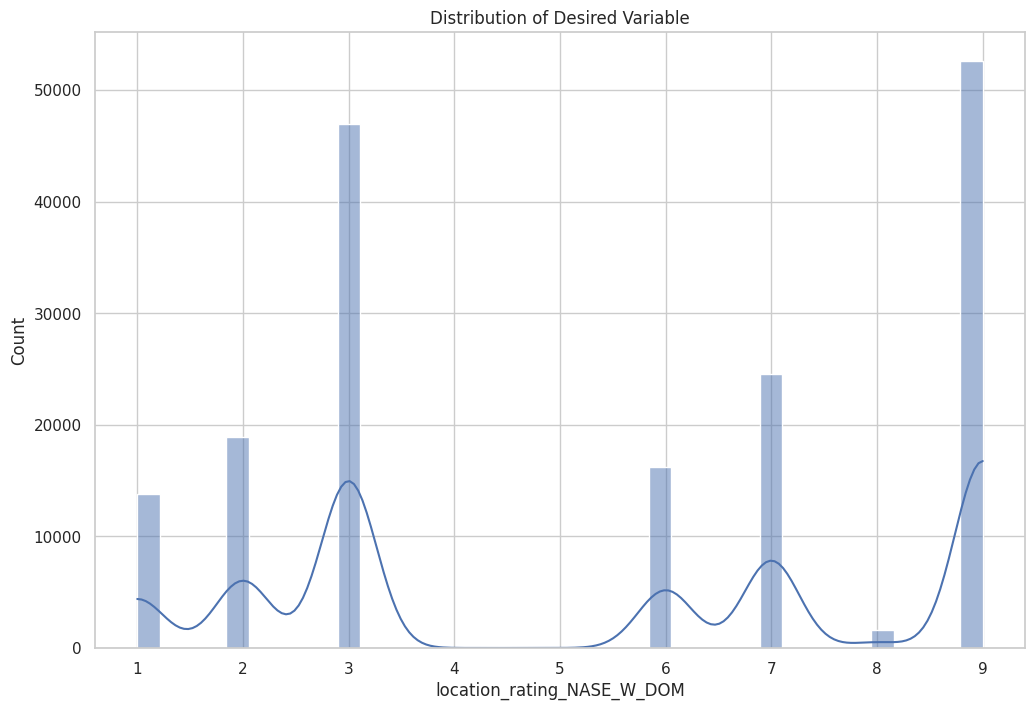

In [26]:
# Visualize dataset distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_data['location_rating_NASE_W_DOM'], kde=True)
plt.title('Distribution of Desired Variable')
plt.show()

Text(0.5, 1.0, 'Distribution of Room Sizes')

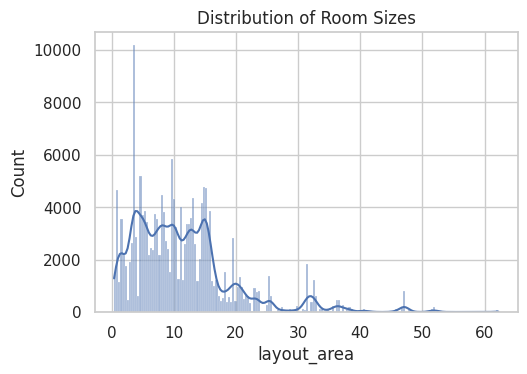

In [28]:
# Room Size or Area Size
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=merged_data['layout_area'], kde=True)
plt.title('Distribution of Room Sizes')


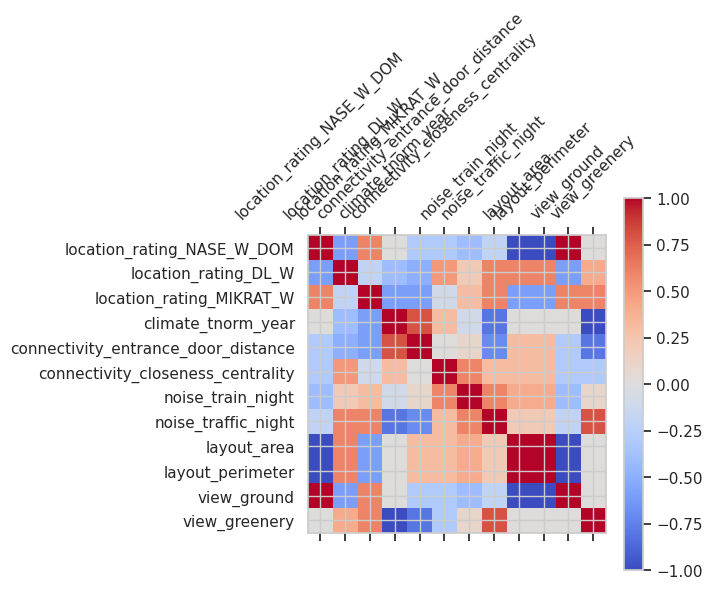

In [30]:
# Generate a correlation heatmap
# Data
data = {
    'location_rating_NASE_W_DOM': [5, 4, 3, 2, 1],
    'location_rating_DL_W': [3, 2, 1, 4, 5],
    'location_rating_MIKRAT_W': [4, 5, 2, 1, 3],
    'climate_tnorm_year': [2, 3, 4, 5, 1],
    'connectivity_entrance_door_distance': [1, 3, 5, 4, 2],
    'connectivity_closeness_centrality': [2, 4, 1, 5, 3],
    'noise_train_night': [1, 5, 2, 3, 4],
    'noise_traffic_night': [3, 4, 1, 2, 5],
    'layout_area': [40, 50, 60, 70, 80],
    'layout_perimeter': [30, 40, 50, 60, 70],
    'view_ground': [5, 4, 3, 2, 1],
    'view_greenery': [4, 3, 2, 1, 5],
}

df = pd.DataFrame(data)

# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

Text(0.5, 1.0, 'Distribution of Noise Levels from Daytime Car Traffic')

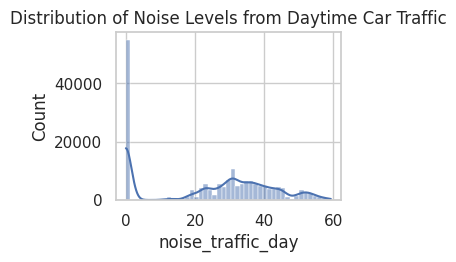

In [32]:
# Noise Levels
plt.subplot(2, 2, 3)
sns.histplot(data=merged_data['noise_traffic_day'], kde=True)
plt.title('Distribution of Noise Levels from Daytime Car Traffic')

Text(0.5, 1.0, 'Distribution of noise_train_night')

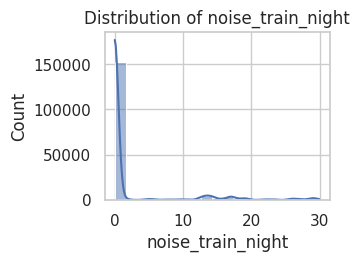

In [37]:
# Connectivity
plt.subplot(2, 2, 4)
sns.histplot(data=merged_data['noise_train_night'], kde=True)
plt.title('Distribution of noise levels from night time train traffic')

Text(0.5, 1.0, 'Distribution of noise levels from night time train traffic')

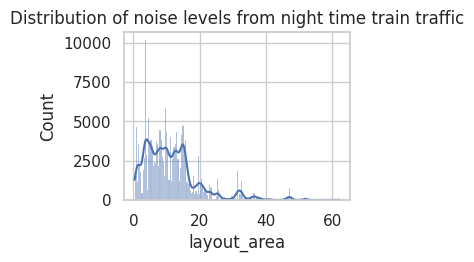

In [38]:
# Layout Area
plt.subplot(2, 2, 4)
sns.histplot(data=merged_data['layout_area'], kde=True)
plt.title('Distribution of The area’s actual area')

Text(0.5, 1.0, 'Distribution of Living situation - Service Quality')

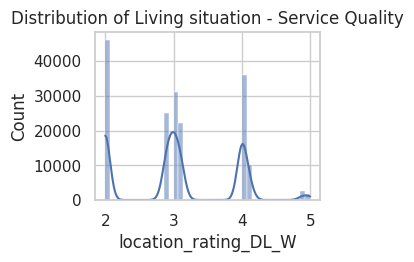

In [39]:
# Living Situation
plt.subplot(2, 2, 4)
sns.histplot(data=merged_data['location_rating_DL_W'], kde=True)
plt.title('Distribution of Living situation - Service Quality')

Text(0.5, 1.0, 'Distribution of The yearly mean temperature in degrees Celsius')

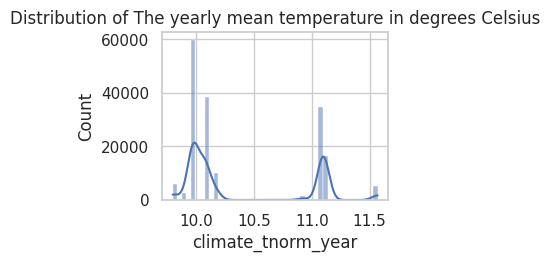

In [41]:
# Climate
plt.subplot(2, 2, 4)
sns.histplot(data=merged_data['climate_tnorm_year'], kde=True)
plt.title('Distribution of The yearly mean temperature in degrees Celsius')